<a href="https://colab.research.google.com/github/Ashif-khan033/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **REGRESSION**    
##### **INDIVIDUAL/TEAM**    
##### **Mohd Ashif Khan**
##### **Mayank Belwal**


# **Project Summary -**

Rossman Sales Prediction data is a data set that contain historical sales data for a retail store chain. The data includes information about the store, such as Competitior’s Detail, type, holiday’s, as well as number of the customers and sales transaction, such as the date, time, and amount of sale on each day.

After understanding the data and getting variables, we first gathered and clean the data, and handled the null values and finally for getting better results we merged two datasets on inner join after that we have also typecasted the needed features into required format in order to visualize them properly. We performed indepth EDA plotted different types of graphs by separating them into univariate, bivariate and multivariate categories and we gathered many good insights from it that helped us to make future decisions of ML model pipeline. Then further on, using feature engineering and data preprocessing we have extracted features like PromoDuration and CompetitionDuration that helped us to get rid of some 4 features that are not directly impacting our Sales. We also tried to get some impacting features by removing multicollinearity by reducing the various inflation factor(VIF) of the independent variables. Under the umbrella of feature engineering we have also defined two codes for outliers detection and outliers treatment with the help of IQR technique and capped all the outliers of continous features in 25-75 percentile. Also, we have noticed that some of the features were categorical in nature and ML model can not understand the language of alphabets(strings). So, we have encoded them into numericals using One-Hot Encoding technique as they were unordered in nature.

Now as we are ready with our final features but still there were two problems with us. First is we don't have normally distributed data with us which is very essential as having normally distributed data is the one of the assuptions of linear model such as Linear Regression. And the other is we don't have the data on the same scale i.e values are lying far apart from each other. In order to get normally distributed data we have applied various transformation techniques such as Logarithmic Transformation, Exponential Transformation, Square root Transformation and others as well and plotted the quantie-quantile plot for visualizing how far our data points are from the normal distributions. For our second challenge i.e data on same scale we have used the sklearn library StandardScaler to scale the data.

At last we splited the dataset into training and testing sets. Next, we choose various linear and non linear supervised machine learning algorithms and use the training data to train the model. Finally, we evaluated the model's performance on the testing data to see how well it is able to predict the sales for the real time data. For this task we used many machine learning algorithms, including linear regression, decision trees, random forests, LightGBM and XGboost. In the beginning as our data is not much linearly dependent , we only achieved 85% accuracy even after using regularization techniques i.e Lasso, Ridge and even Elastic Net in linear regression model. We knew that complex model do not have underlying statistical assumptions so we were expecting more significant accuracies in higher comlex model. In Decsion Tree we have achieved approx 91% accuracy with maximum depth of 15. on increasing the depth over it we are falling towards overfitting which ultimately increases the variance error. We have also tried gradiant boosting technique with LightGBM although we got the similar results as Random Forest(~92%) but we got the results faster as it uses all the cores and decreases the processing time. At last we have implemented our final model i.e XGboost and achieved the accuracy of 94% with mean absolute percentage error of only 5%. Also we got the mean of residuals as 1.24 (pretty close to 0) which is indicating towards normally distributed residuals.From the above experiments and identifications we have choosen the XGboost as our final optimal model among all 5 models for deployment as it is predicting the highest accuracy with the least error.

Overall, while building a machine learning model on Rossman Sales Prediction data we applied combination of data processing, machine learning techniques, and model evaluation skills. It was a challenging task and we have faced some failures as well but with the right approach and knowledge, we were able to create a model that can accurately predict sales upto six weeks in advance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


A Rossmann is a private drug store chain based in Germany, with main operations on Europe. Operates over **3,000 drug stores in 7 different contries**. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for **1,115** Rossmann stores. The task is to forecast the **"Sales"** column for the test set. Note that some record stores in dataset were temporarily closed for renovations.


#### **Define Your Business Objective?**

Analyse the historical sales data for 1,115 Rossmann stores and build a machine learning model to forecast the sales of each Rossmann store upto 6 weeks.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [467]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 

### Dataset Loading

In [468]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [469]:
df_rossmann = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/Rossmann Stores Data.csv")
df_store = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_2/store.csv")

####**Dataset First View**

In [470]:
# Dataset First Look
df_rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [471]:
df_rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [472]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [473]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


#### **Dataset Rows & Columns count**

In [474]:
# total number of rows in rossmann dataframe
num_of_rows = df_rossmann.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_rossmann.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1017209
Total no. of columns: 9


In [475]:
# total number of rows in store dataframe
num_of_rows = df_store.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = df_store.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1115
Total no. of columns: 10


#### **Dataset Information**

In [476]:
# Rossmann Dataset Info
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [477]:
# Store Dataset Info
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### **Duplicate Values**

In [478]:
# number of duplicate rows
num_of_dup_rows = df_rossmann.duplicated(["Store","Date"]).sum()
print(f"No. of duplicate rows in rossmann dataset: {num_of_dup_rows}")

No. of duplicate rows in rossmann dataset: 0


In [479]:
num_of_dup_rows = df_store.duplicated(["Store"]).sum()
print(f"No. of duplicate rows in store dataset: {num_of_dup_rows}")

No. of duplicate rows in store dataset: 0


#### **Missing Values/Null Values**

In [480]:
# Missing Values/Null Values Count
df_rossmann.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [481]:
df_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

The rossmann dataset does not contain null values but the store dataset have null values in dataset.So, we all deal these null values in future.

In [482]:
# importing missingo library which helps us to visualize the missing values
import missingno as msno

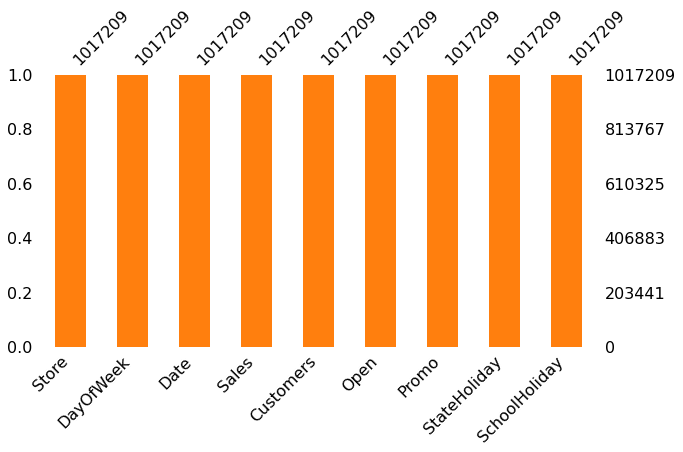

In [483]:
# Visualizing the missing values in Rossmann dataset
msno.bar(df_rossmann,figsize=(10,5), color="tab:orange")

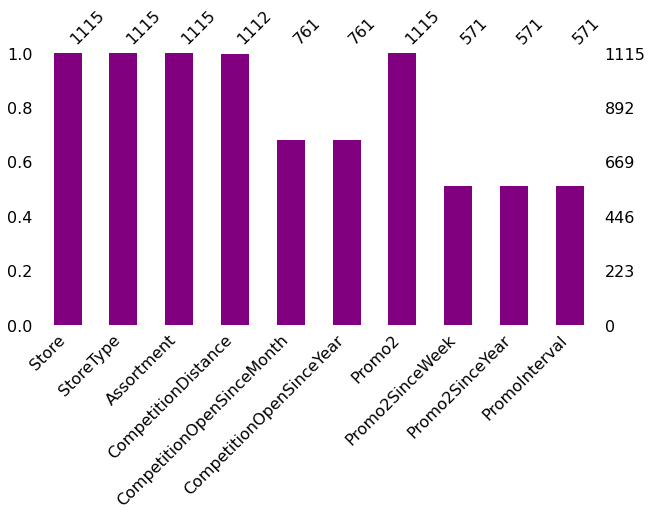

In [484]:
# Visualizing the missing values in Store dataset
msno.bar(df_store,figsize=(10,5),color="purple")

In [485]:
# define a function to find the number and percentage of missing values in a dataframe
df_null_store = pd.DataFrame((df_store.isna().sum()/df_store.shape[0])*100)
df_null_store["count"] = list(df_store.isna().sum().values)
df_null_store.rename(columns={0:"column"},inplace=True)
df_null_store.sort_values(by = ["count"],ascending = False)

,column,count
Promo2SinceWeek,48.789238,544
Promo2SinceYear,48.789238,544
PromoInterval,48.789238,544
CompetitionOpenSinceMonth,31.748879,354
CompetitionOpenSinceYear,31.748879,354
CompetitionDistance,0.269058,3
Store,0.000000,0
StoreType,0.000000,0
Assortment,0.000000,0
Promo2,0.000000,0


### What did you know about your dataset?

#####> Store dataframe contains 10 columns.
#####> Six columns have missing values.
#####>Four columns require conversion of datatypes.
#####Additionally, new columns need to be added from existing ones to make analysis easier

## ***2. Understanding Your Variables***

In [486]:
# Dataset Columns
list(df_rossmann.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [487]:
list(df_store.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [488]:
#Rossmann Dataset Describe
df_rossmann.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [489]:
# Store dataset describe
df_store.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description 

Answer Here

#### **Check Unique Values for each variable**

In [490]:
# Check Unique Values for each variable.
df_rossmann.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [491]:
df_store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

#####**(a) Null Values Treament**

In [492]:
df_store[df_store["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


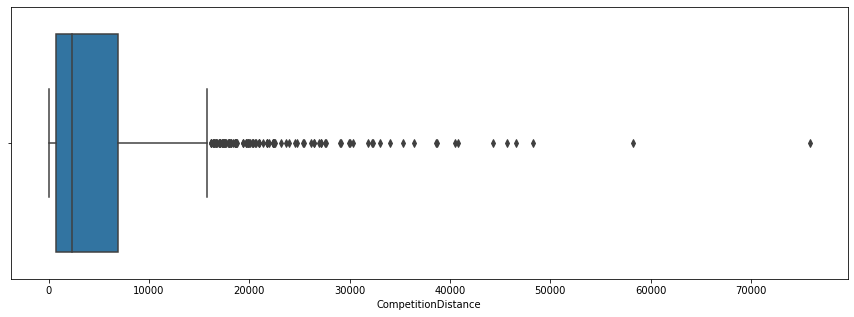

In [493]:
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

In [494]:
#filling the missing values with median
df_store['CompetitionDistance'].fillna(value = int(df_store.CompetitionDistance.median()), inplace = True)

In [495]:
#rechecking the null values in CompetitionDistance
df_store[df_store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

In [496]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [497]:
##Handling null values from CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature.
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [498]:
df_store[df_store['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<Figure size 1080x360 with 0 Axes>

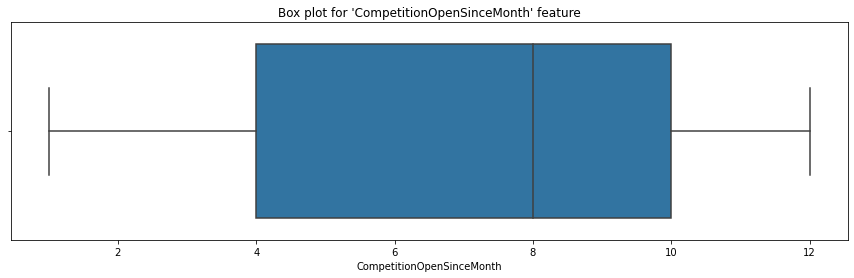

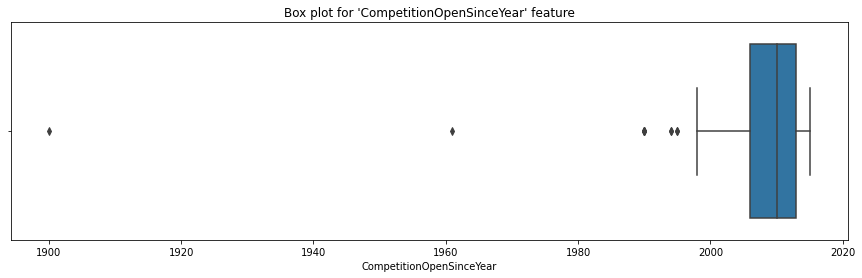

In [499]:
plt.figure(figsize=(15,5))
x= ["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"]
for i in x:
  plt.figure(figsize=(15,4))
  sns.boxplot(df_store[i])
  plt.title(f"Box plot for '{i}' feature")
  plt.show()

In [500]:
#filling the missing values with mode
df_store['CompetitionOpenSinceMonth'].fillna(value = df_store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_store['CompetitionOpenSinceYear'].fillna(value = df_store['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [501]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [502]:
# filling the missing values with value 0 (Promo2SinceWeek, Promo2SinceYear and PromoInterval feature)
df_store["Promo2SinceWeek"].fillna(value = 0, inplace=True)
df_store["Promo2SinceYear"].fillna(value = 0, inplace=True)
df_store["PromoInterval"].fillna(value = 0, inplace=True)

In [503]:
#again checking null values
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [504]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### >>Now, no missing values in dataframe.We can proceed for further analyses.

#### **Merging datasets**

In [505]:
# Write your code to make your dataset analysis ready.

# merging two dataframes on store column
df= df_rossmann.merge(right=df_store,how="left",on="Store")
df.shape

(1017209, 18)

In [506]:
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### **Typecasting**

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [508]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [510]:
#Creating new column for Day , month and year for Date column
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df["WeekOfYear"]=df["Date"].dt.weekofyear

In [511]:
#CompetitionDistance is a numerical feature. Lets check its density plot to choose the value we need to impute missing values.

# sns.distplot(x=df_store['CompetitionDistance'], hist = True)
# plt.xlabel('Competition Distance Distribution Plot');

######The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

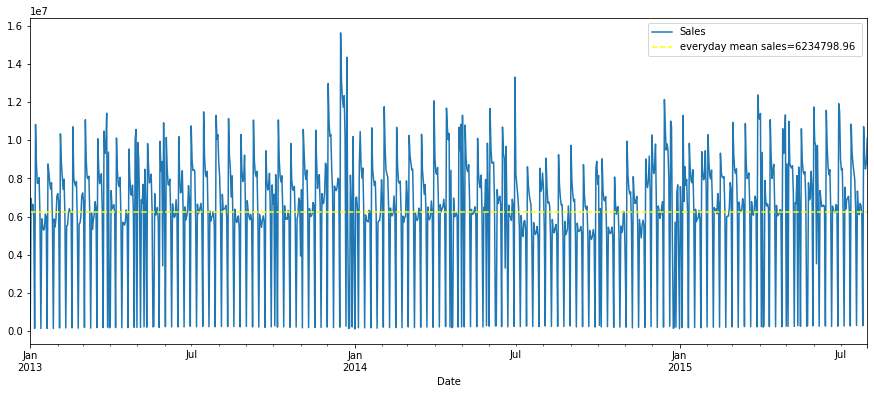

In [512]:
# Chart - 1 visualization code

#Visualizing everyday sales with average everyday sales 
fig, ax= plt.subplots(figsize=(15,6))

eday_sales=df.groupby(["Date"]).Sales.sum()
eday_sales.plot(kind="line",ax=ax)
plt.axhline(y=eday_sales.mean(), label=f"everyday mean sales={round(eday_sales.mean(),2)} ",color="yellow", linestyle="--")
plt.legend()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [513]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'day',
       'WeekOfYear'],
      dtype='object')

#### Chart - 2

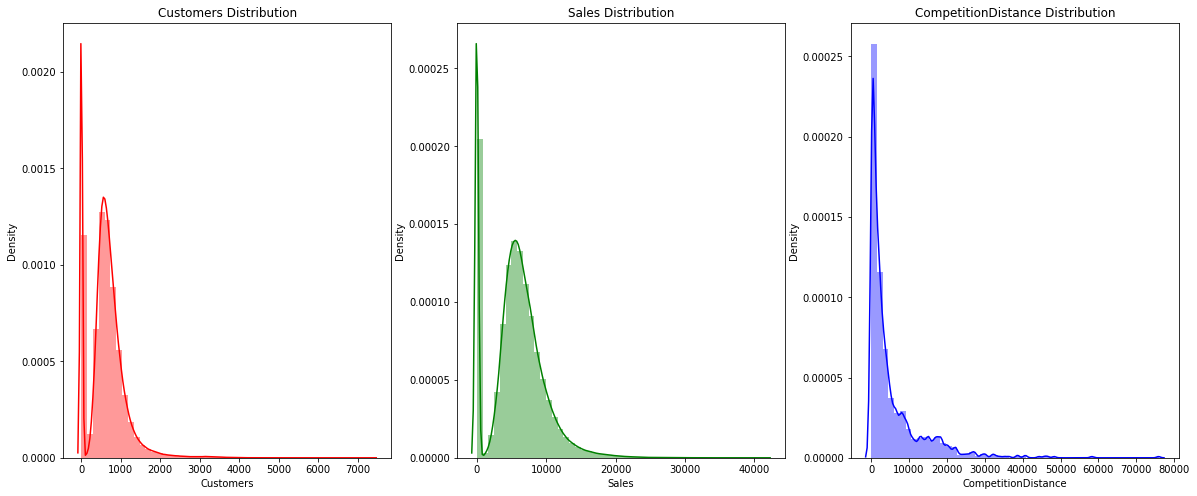

In [514]:
# Chart - 2 visualization code
cont = ['Customers','Sales',"CompetitionDistance"]
colors = ['red', 'green', 'blue']
fig, axs = plt.subplots(1, len(cont), figsize = (20, 8))
for c in range(len(cont)):
    sns.distplot(df[cont[c]], color = colors[c], ax = axs[c])
    axs[c].set_title(f'{cont[c]} Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

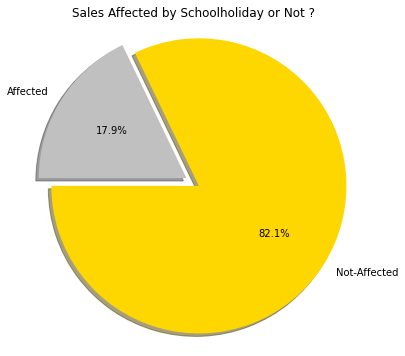

In [515]:
# Chart - 3 visualization code
labels = 'Not-Affected' , 'Affected'
sizes = df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [516]:
df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

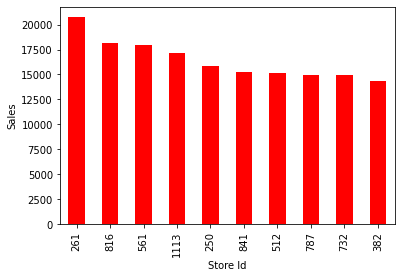

In [517]:
# Chart - 4 visualization code
# top 10 stores with highest average sales
top10stores = df_rossmann.groupby('Store').agg({'Sales': ['mean']}).reset_index()['Sales'].sort_values('mean', ascending = False)[:10]
top10stores['mean'].plot(kind = 'bar', color = 'r')
plt.ylabel('Sales')
plt.xlabel('Store Id')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

Text(0.5, 1.0, 'Sales vs Promotion (0-No Promotion, 1-Promotion)')

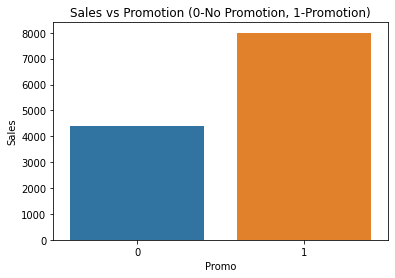

In [518]:
# Chart - 5 visualization code
ax= sns.barplot(x=df["Promo"], y=df["Sales"])
plt.title("Sales vs Promotion (0-No Promotion, 1-Promotion)")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [519]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [520]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [521]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [522]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [523]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [524]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [525]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [526]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [527]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?


Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [528]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [529]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [530]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [531]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [532]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
day                          0
WeekOfYear                   0
dtype: int64

We don't have any missing values. We alraedy removed all missing/null/duplicate values in Data Wrangling section.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We checked all missing/null values of various columns and replaced with median and mode.

### **2. Handling Outliers**

Lets check for outliers in competition distance with a box plot.

In [533]:
# generate a box plot for competition distance
#generate_horizontal_box_plot(df_rossmann, 'CompetitionDistance')

# count and percentage of outliers in competition distance
#count, perc = get_outlier_count_and_percentage(df_rossmann, 'CompetitionDistance')
#print(f"Outliers in competition distance : {count} ({perc}%)")

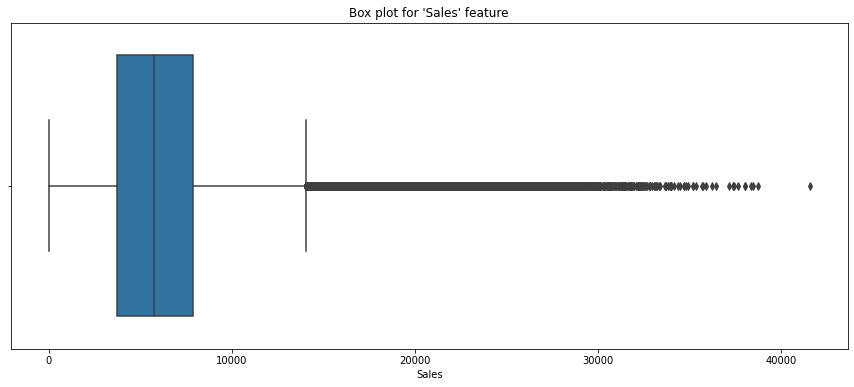

In [534]:
#df1=df1[df1['Sales']!=0]
plt.figure(figsize=(15,6))
sns.boxplot(df["Sales"])
plt.title("Box plot for 'Sales' feature")
plt.show()

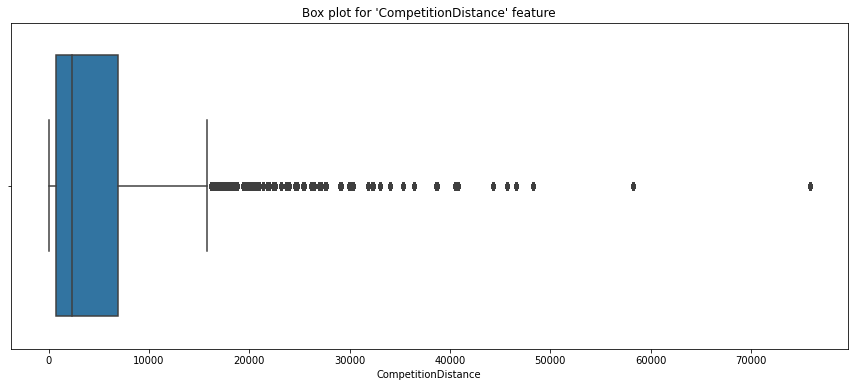

In [535]:
plt.figure(figsize=(15,6))
sns.boxplot(df["CompetitionDistance"])
plt.title("Box plot for 'CompetitionDistance' feature")
plt.show()

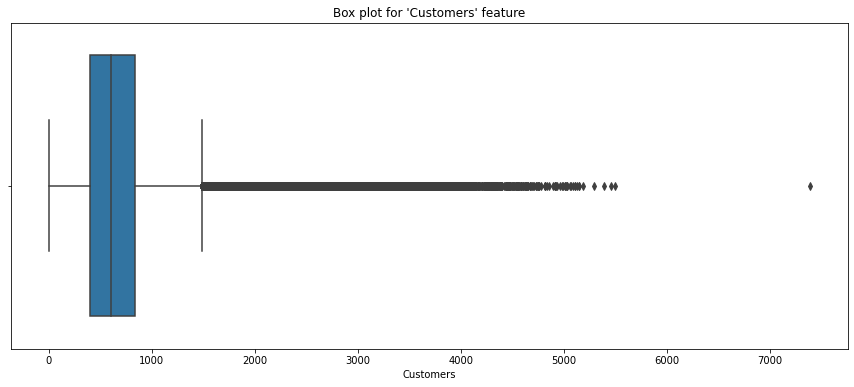

In [536]:
plt.figure(figsize=(15,6))
sns.boxplot(df["Customers"])
plt.title("Box plot for 'Customers' feature")
plt.show()

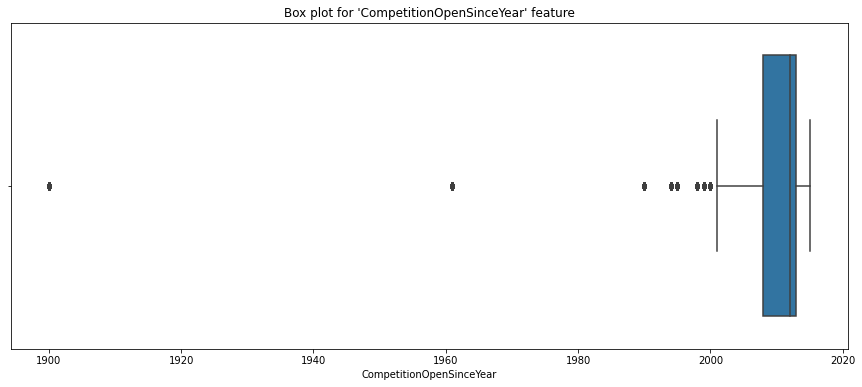

In [537]:
plt.figure(figsize=(15,6))
sns.boxplot(df["CompetitionOpenSinceYear"])
plt.title("Box plot for 'CompetitionOpenSinceYear' feature")
plt.show()

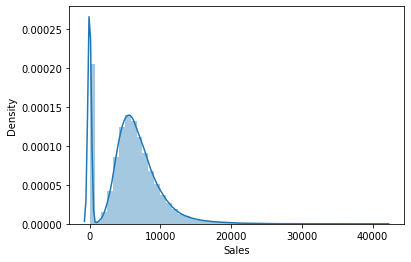

In [538]:
# Handling Outliers & Outlier treatments
df1=df.copy()
sns.distplot(df1.Sales)
# will be removing rows with zero sales

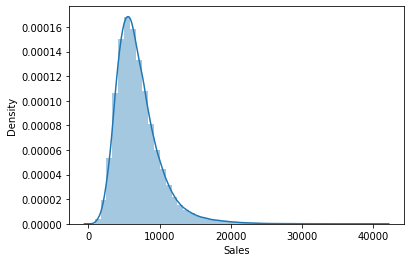

In [539]:
df1=df1[df1['Sales']!=0]
sns.distplot(df1.Sales)
# right skewed distribution, we will apply log transformation on slaes column

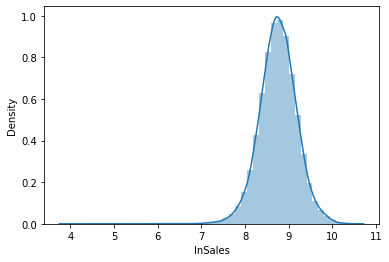

In [540]:
df1["lnSales"]=np.log(df1["Sales"])
sns.distplot(df1.lnSales)

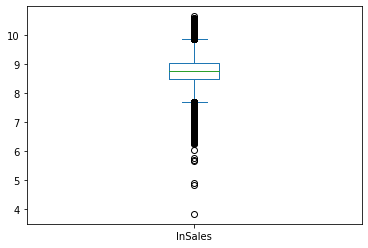

In [541]:
df1["lnSales"].plot(kind="box")

In [542]:
df1["lnSales"].describe()

count    844338.000000
mean          8.757564
std           0.425278
min           3.828641
25%           8.488588
50%           8.759198
75%           9.031214
max          10.634677
Name: lnSales, dtype: float64

10.05

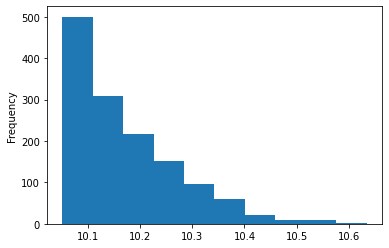

In [543]:
# we will be treating data outside 3 standard deviation as outlier
sales_mean= round(df1["lnSales"].mean(),2)
sales_std=round(df1["lnSales"].std(),2)
sls_uprbnd=sales_mean+3*sales_std
df1[df1["lnSales"]>sls_uprbnd].shape
df1[df1["lnSales"]>sls_uprbnd].shape[0]/df1["lnSales"].shape[0]
df1[df1["lnSales"]>sls_uprbnd]["lnSales"].plot(kind="hist")
sls_uprbnd

In [544]:
# checking how many times promotion was going on when stores had abnormally high sales 
df1[df1["lnSales"]>sls_uprbnd].Promo.value_counts()

1    994
0    382
Name: Promo, dtype: int64

This implies that promotion does have a impact on sales

In [545]:
# checking for reasons of abnormally high sales when no promotion was going on
temp=df1[(df1["lnSales"]>sls_uprbnd)] 
temp=temp[temp["Promo"]!=1]
for c in list(temp.columns):
 if c in ["Store","DayOfWeek","StoreType","CompetitionDistance","Month"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

 Value counts of Store
262     146
817      48
1114     39
842      20
756      18
251      15
586      12
523      10
513       7
562       7
Name: Store, dtype: int64
 Value counts of DayOfWeek
7    128
6     86
1     79
5     31
2     26
4     19
3     13
Name: DayOfWeek, dtype: int64
 Value counts of StoreType
a    176
b    153
c     28
d     25
Name: StoreType, dtype: int64
 Value counts of CompetitionDistance
1180    146
140      50
870      39
50       29
1200     20
340      15
250      15
400       7
1210      7
1130      6
Name: CompetitionDistance, dtype: int64
 Value counts of Month
12    124
5      49
6      31
4      30
2      26
11     25
3      24
1      21
7      17
10     15
Name: Month, dtype: int64


Upon Analysing the value counts for sales> sls_uprbnd and promotion not applied, we notice the following points:



*   High sales happened mostly in the case of December, in store type 'a' or 'b'
*   Also it happened most of the times when the Day of the week was Saturday(6),Sunday(7) or Monday(1)

So we will not be doing anything with the outliers , since they do not occur randomly.


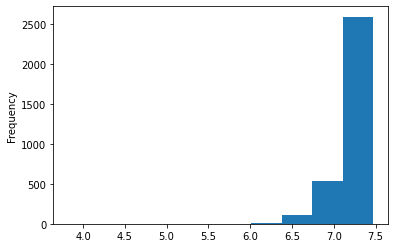

In [546]:
sls_lwrbnd=sales_mean-3*sales_std
df1[df1["lnSales"]<sls_lwrbnd].shape
df1[df1["lnSales"]<sls_lwrbnd].shape[0]/df1["lnSales"].shape[0]
df1[df1["lnSales"]<sls_lwrbnd]["lnSales"].plot(kind="hist")

In [547]:
df1[df1["lnSales"]<sls_lwrbnd].Promo.value_counts()

0    3131
1     120
Name: Promo, dtype: int64

Again,Lower sales happen when no promotion was going on

In [548]:
# checking for reasons of abnormally low sales when promotion was going on
temp=df1[(df1["lnSales"]<sls_lwrbnd)] 
temp=temp[temp["Promo"]!=0]
for c in list(temp.columns):
 if c in ["SchoolHoliday","DayOfWeek","StoreType","CompetitionDistance","Month","StateHoliday"]:
  print(f" Value counts of {c}")
  print(temp[c].value_counts().head(10))

 Value counts of DayOfWeek
1    40
4    27
2    25
3    15
5    13
Name: DayOfWeek, dtype: int64
 Value counts of StateHoliday
0    93
0    21
a     6
Name: StateHoliday, dtype: int64
 Value counts of SchoolHoliday
0    109
1     11
Name: SchoolHoliday, dtype: int64
 Value counts of StoreType
a    86
c    18
d    11
b     5
Name: StoreType, dtype: int64
 Value counts of CompetitionDistance
360      26
11470     8
600       8
740       6
3640      5
620       4
250       4
26490     4
180       3
12430     3
Name: CompetitionDistance, dtype: int64
 Value counts of Month
2     39
3     33
1     29
6      8
10     4
8      2
5      1
7      1
12     1
11     1
Name: Month, dtype: int64


Upon Analysing the value counts for sales< sls_lwrbnd and promotion applied, we notice the following points:



*   Low sales have never happened on a Saturday or Sunday 
*   Also it happened most of the times in 'a' Store type or in the 1st quarter, i.e Jan, Feb , March.

So we will not be doing anything with the outliers , since they do not occur randomly.

In [549]:
# sls_lwrbnd=sales_mean-3*sales_std
# df1[df1["lnSales"]<sls_lwrbnd].shape
# df1[df1["lnSales"]>sls_lwrbnd].shape[0]/df1["lnSales"].shape[0]
# df1[df1["lnSales"]>sls_lwrbnd]["lnSales"].plot(kind="hist")

In [550]:
#df1[df1["lnSales"]<sls_lwrbnd].Promo.value_counts()

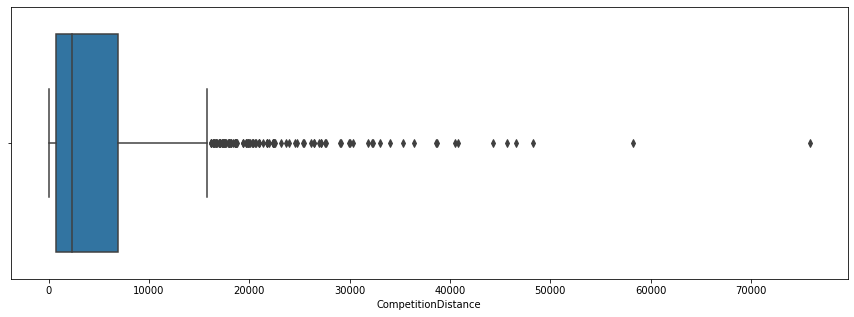

In [551]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df_store["CompetitionDistance"])

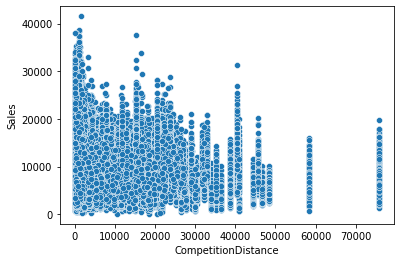

In [552]:
sns.scatterplot(df1["CompetitionDistance"],df1["Sales"])

In [553]:
df1["CompetitionDistance"].describe()

count    844338.000000
mean       5450.044852
std        7801.082007
min          20.000000
25%         710.000000
50%        2325.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [554]:
sumsales_a=df1[df1["CompetitionDistance"]<710].Sales.sum()
sumsales_b=df1[(df1["CompetitionDistance"]<2325) & (df1["CompetitionDistance"]>=710) ].Sales.sum()
sumsales_c=df1[(df1["CompetitionDistance"]<6880) & (df1["CompetitionDistance"]>=2325)].Sales.sum()
sumsales_d=df1[df1["CompetitionDistance"]>=6880].Sales.sum()
totalsales=df1["Sales"].sum()
[sumsales_a/totalsales,sumsales_b/totalsales,sumsales_c/totalsales,sumsales_d/totalsales]
# we can see that sales get evenly divided when we divide the competition distance into 4 parts, based on 1st,2nd and 3rd quantile values of Competition Distance.

[0.2616208047446594,
 0.2506662315534238,
 0.2415711693667079,
 0.24614179433520889]

We will be encoding Competitiondistance as 1,2,3,4, 
1 signifying that the competition is closely located and 4 signifying that the competition is far away

From the Scatter plot also we can notice that sales density decreased (plot became more sparse) as Competition distance increased.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [555]:
# Encode your categorical columns

# encoding competition distance as 1,2,3,4 based on the values of Quantile
def dist_code(x):
  if(x<710):
    return(1)
  elif(x>=710 and x<2325):
    return(2)
  elif(x>=2325 and x<6880):
    return(3)
  elif(x>=6880):
    return(4) 
df1["CompetitionDistanceCode"]=list(map(dist_code,df1["CompetitionDistance"]))

# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

print(df1["CompetitionDistanceCode"].value_counts())

2    211941
4    211641
3    211595
1    209161
Name: CompetitionDistanceCode, dtype: int64


In [556]:
df1["StateHoliday"].value_counts()

0.0    731308
1.0       910
Name: StateHoliday, dtype: int64

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [557]:
# Expand Contraction

#### 2. Lower Casing

In [558]:
# Lower Casing

#### 3. Removing Punctuations

In [559]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [560]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [561]:
# Remove Stopwords

In [562]:
# Remove White spaces

#### 6. Rephrase Text

In [563]:
# Rephrase Text

#### 7. Tokenization

In [564]:
# Tokenization

#### 8. Text Normalization

In [565]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [566]:
# POS Taging

#### 10. Text Vectorization

In [567]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

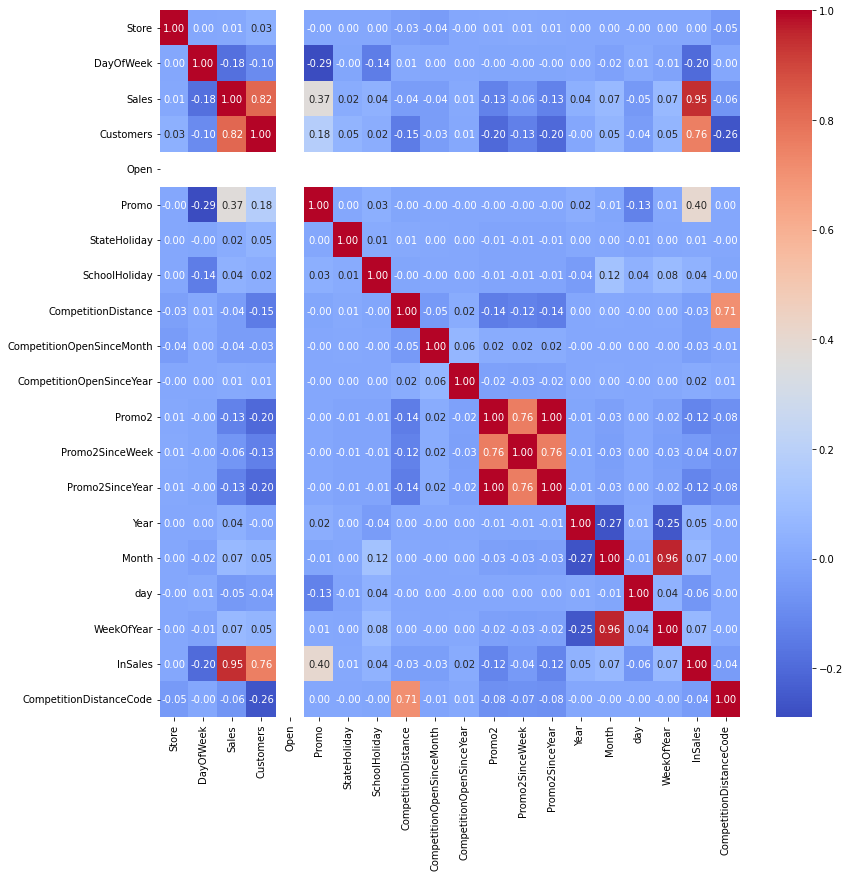

In [568]:
# Manipulate Features to minimize feature correlation and create new features

corr_map=df1.corr()
plt.rcParams['figure.figsize'] = 13,13
sns.heatmap(corr_map,annot=True, fmt=".2f", cmap="coolwarm");

In [569]:
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#### 2. Feature Selection

In [571]:
# Select your features wisely to avoid overfitting
# drop Store
#df.drop('Store', axis=1, inplace=True)

Lets remove date since there are already day of week and week of year features in the dataset.

In [572]:
# drop Date
#df.drop('Date', axis=1, inplace=True)

Lets remove competition open since month and competition open since year as the information provided by them can be obtained from competition open number of months.

In [573]:
# drop CompetitionOpenSinceMonth & CompetitionOpenSinceYear
#df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

Lets remove promo 2, promo 2 since week and promo 2 since year as the information provided by them can be obtained from promo 2 number of weeks.

In [574]:
# drop Promo2, Promo2SinceWeek & Promo2SinceYear
#df.drop(['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'], axis=1, inplace=True)

Lets remove month since we get the same information from week of the year.

In [575]:
# drop Month
#df.drop('Month', axis=1, inplace=True)

Lets remove year as we have already established in EDA that its not the year that influence the sales but the day of the week

In [576]:
# drop Year
#df.drop('Year', axis=1, inplace=True)

In [577]:
df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'PromoInterval', 'day', 'WeekOfYear'],
      dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [578]:
# Transform Your data

### 6. Data Scaling

In [579]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [580]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [581]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [582]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [583]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [584]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [585]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [586]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [587]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [588]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [589]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [590]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [591]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [592]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***